# Zadanie domowe - EDA Danych dotyczących Irysów

* Twoim zadaniem jest wykonanie analizy danych zawartych w załączonym pliku CSV (`26__titanic.csv`).
* Plik znajduje się pod video. Pamiętaj, żeby wrzucić plik do tego samego folderu, w którym znajduje się ten notebook.
* Wykorzystaj nowo nabytą wiedzę z biblioteki `Pandas`
* Jeżeli jest taka konieczność posiłkuj się [code explainerem](https://codeexplainer.imprv.ai/) lub / i [data chatterem](https://datachatter.imprv.ai/) (który również te dane ma dostępne).
* Prześlij na discordzie notebook z rozwiązaniem (`#modul-4-zad2`)
* Pamiętaj:

1. Nie spiesz się
2. Potraktuj zadanie domowe jak prawdziwy projekt
3. Dodawaj opisy, obserwacje, wnioski
4. Dodaj wizualizacje
5. Dodaj konkluzję i wnioski końcowe

Powodzenia!!! I mega zabawy!

## O Danych

Dane o pasażerach Titanica

Zbiór danych zawiera informacje o pasażerach RMS Titanic, który zatonął 15 kwietnia 1912 roku po zderzeniu z górą
lodową. Dane obejmują takie atrybuty jak klasa podróży, wiek, płeć, liczba rodzeństwa/małżonków na pokładzie,
liczba rodziców/dzieci na pokładzie, cena biletu oraz miejsce zaokrętowania.

Zbiór zawiera także informację o tym, czy pasażer przeżył katastrofę.

Titanic przewoził ponad 2,200 osób, z czego ponad 1,500 zginęło, co czyni tę katastrofę jedną z najbardziej
tragicznych w historii morskiej.

Kolumny:

* **pclass** - Klasa biletu
* **survived** - Czy pasażer przeżył katastrofę
* **name** - Imię i nazwisko pasażera
* **sex** - Płeć pasażera
* **age** - Wiek pasażera
* **sibsp** - Liczba rodzeństwa/małżonków na pokładzie
* **parch** - Liczba rodziców/dzieci na pokładzie
* **ticket** - Numer biletu
* **fare** - Cena biletu
* **cabin** - Numer kabiny
* **embarked** - Port, w którym pasażer wszedł na pokład (C = Cherbourg, Q = Queenstown, S = Southampton)
* **boat** - Numer łodzi ratunkowej
* **body** - Numer ciała (jeśli pasażer nie przeżył i ciało zostało odnalezione)
* **home.dest** - Miejsce docelowe

In [165]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [166]:
df = pd.read_csv('26__titanic.csv', sep=",")
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [167]:
liczba_wierszy=df.shape[0]
print(f"Liczba wierszy: {liczba_wierszy}")
num_duplicates = df.duplicated().sum()
if num_duplicates:
    print(f"Liczba duplikatów w DataFrame: {num_duplicates}")
    df = df.drop_duplicates()
    liczba_wierszy=len(df)
    print(f"Po usunięciu duplikatów Liczba wierszy: {liczba_wierszy}")
df.head()

Liczba wierszy: 1310


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [168]:
# Sprawdzanie, które wiersze zawierają wartości None (NaN)
rows_with_nan = df.isnull().any(axis=1)

# Liczba wierszy zawierających wartości None (NaN)
num_rows_with_nan = rows_with_nan.sum()

print(f"Liczba wierszy zawierających co najmniej jedną wartość None (NaN): {num_rows_with_nan}")

# Wyświetl macierz zawierającą nazwy kolumn, które z nich zawiera wartości None, jaki to stanowi procent we wszystkich wpisach
null_counts = df.isnull().sum()
null_percentage = (null_counts / len(df)) * 100
null_info = pd.DataFrame({
    'Liczba NULL': null_counts,
    'Procent NULL w obserwacjach': null_percentage
})
print(null_info)
print(df.describe())

print("statystyki łodzi ratunkowych", df['boat'].describe())

Liczba wierszy zawierających co najmniej jedną wartość None (NaN): 1310
           Liczba NULL  Procent NULL w obserwacjach
pclass               1                     0.076336
survived             1                     0.076336
name                 1                     0.076336
sex                  1                     0.076336
age                264                    20.152672
sibsp                1                     0.076336
parch                1                     0.076336
ticket               1                     0.076336
fare                 2                     0.152672
cabin             1015                    77.480916
embarked             3                     0.229008
boat               824                    62.900763
body              1189                    90.763359
home.dest          565                    43.129771
            pclass     survived          age        sibsp        parch  \
count  1309.000000  1309.000000  1046.000000  1309.000000  1309.000000   


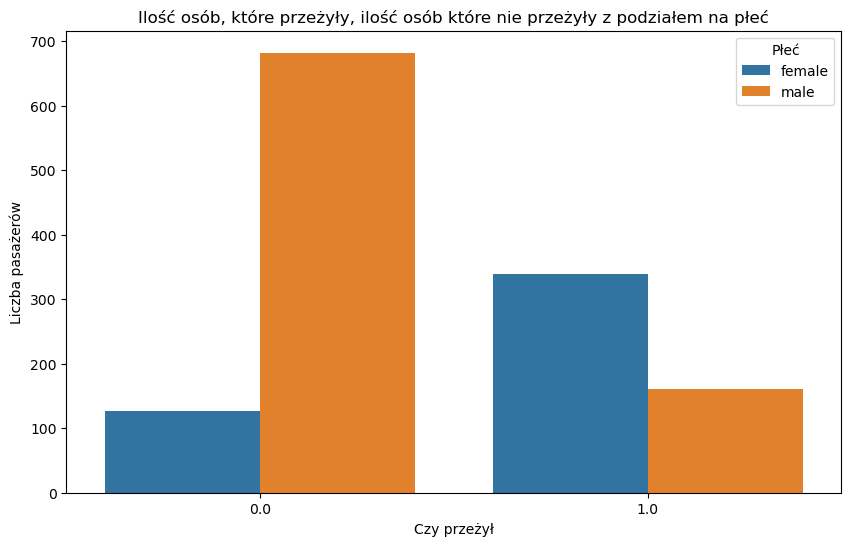

In [169]:
plt.figure(figsize=(10, 6))
sns.countplot(x='survived', hue='sex', data=df)
plt.title('Ilość osób, które przeżyły, ilość osób które nie przeżyły z podziałem na płeć')
plt.xlabel('Czy przeżył')
plt.ylabel('Liczba pasażerów')
plt.legend(title='Płeć', loc='upper right')
plt.show()


Najwięcej przeżyło kobiet

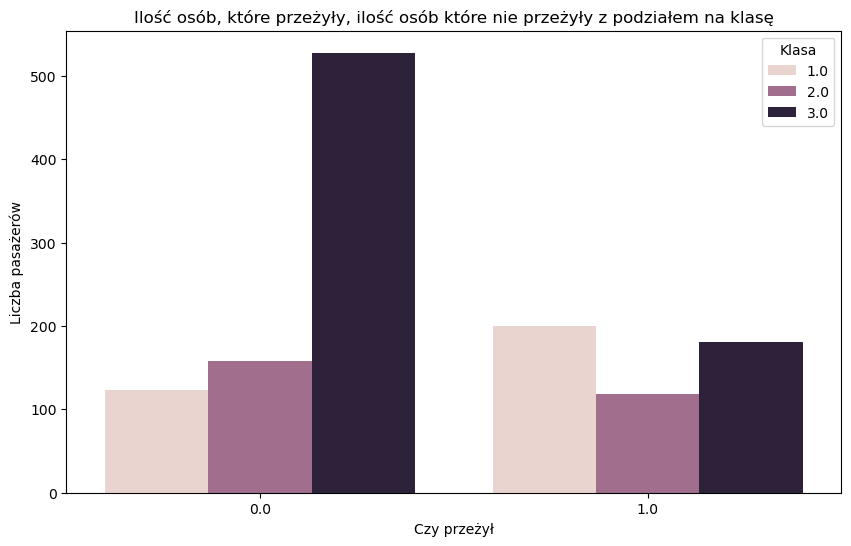

In [170]:
plt.figure(figsize=(10, 6))
sns.countplot(x='survived', hue='pclass', data=df)
plt.title('Ilość osób, które przeżyły, ilość osób które nie przeżyły z podziałem na klasę')
plt.xlabel('Czy przeżył')
plt.ylabel('Liczba pasażerów')
plt.legend(title='Klasa', loc='upper right')
plt.show()

najwięcej osób zginęło w 3. klasie, następnie 2., najmniej w 1.. Najwięcej osób przeżyło w 1. klasie, następnie 3. klasie, następnie 2. klasie.

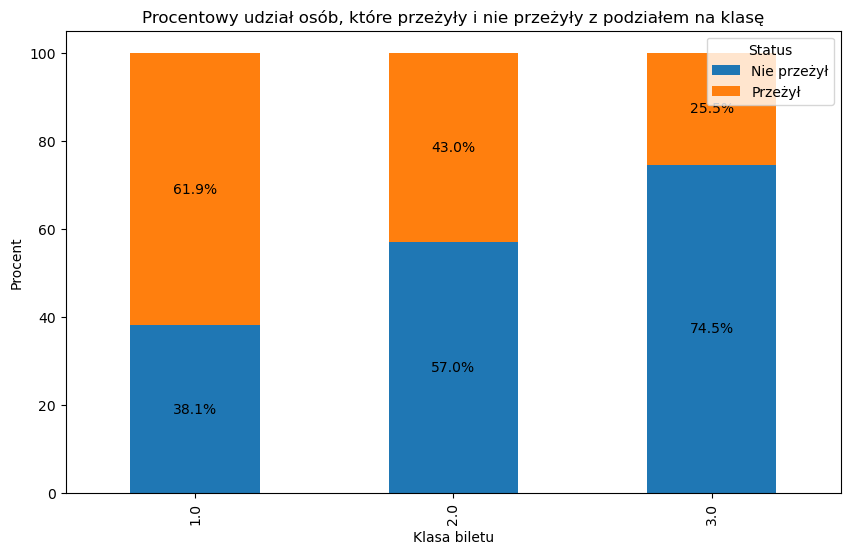

In [171]:
# Obliczenie procentowego udziału przeżycia z podziałem na klasę
survival_rate = df.groupby('pclass')['survived'].value_counts(normalize=True).unstack() * 100

# Utworzenie wykresu
plt.figure(figsize=(10, 6))
survival_rate.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Procentowy udział osób, które przeżyły i nie przeżyły z podziałem na klasę')
plt.xlabel('Klasa biletu')
plt.ylabel('Procent')
plt.legend(['Nie przeżył', 'Przeżył'], title='Status', loc='upper right')

# Dodanie etykiet z wartościami
for p in plt.gca().patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    plt.gca().annotate(f'{height:.1f}%', (x + width / 2, y + height / 2), ha='center', va='center')

plt.show()

w ujęciu strukturalnym największa przeżywalność była w 1. klasie, następnie 2. klasie, następnie 3. klasie.

<Figure size 1200x800 with 0 Axes>

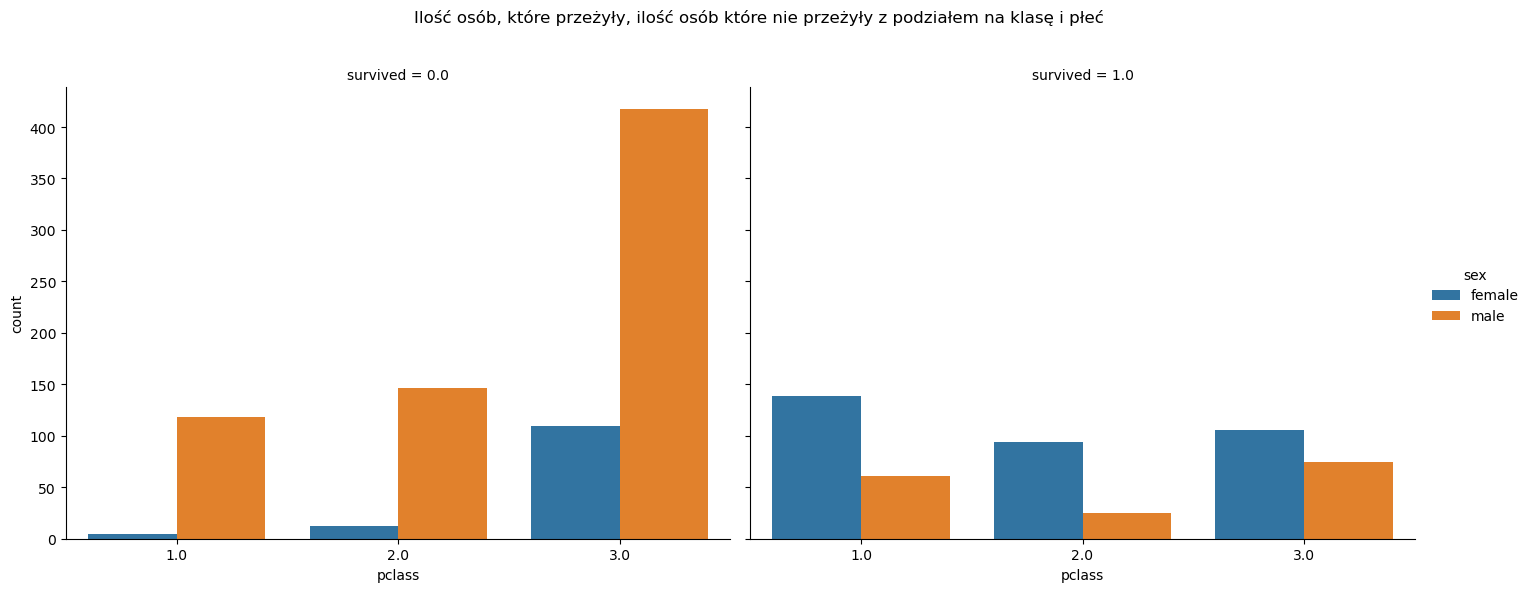

In [172]:
plt.figure(figsize=(12, 8))
sns.catplot(x='pclass', hue='sex', col='survived', data=df, kind='count', height=6, aspect=1.2)
plt.subplots_adjust(top=0.85)
plt.suptitle('Ilość osób, które przeżyły, ilość osób które nie przeżyły z podziałem na klasę i płeć')
plt.show()


we wszystkich klasach węcej przeżyło kiebiet niż mężczyzn

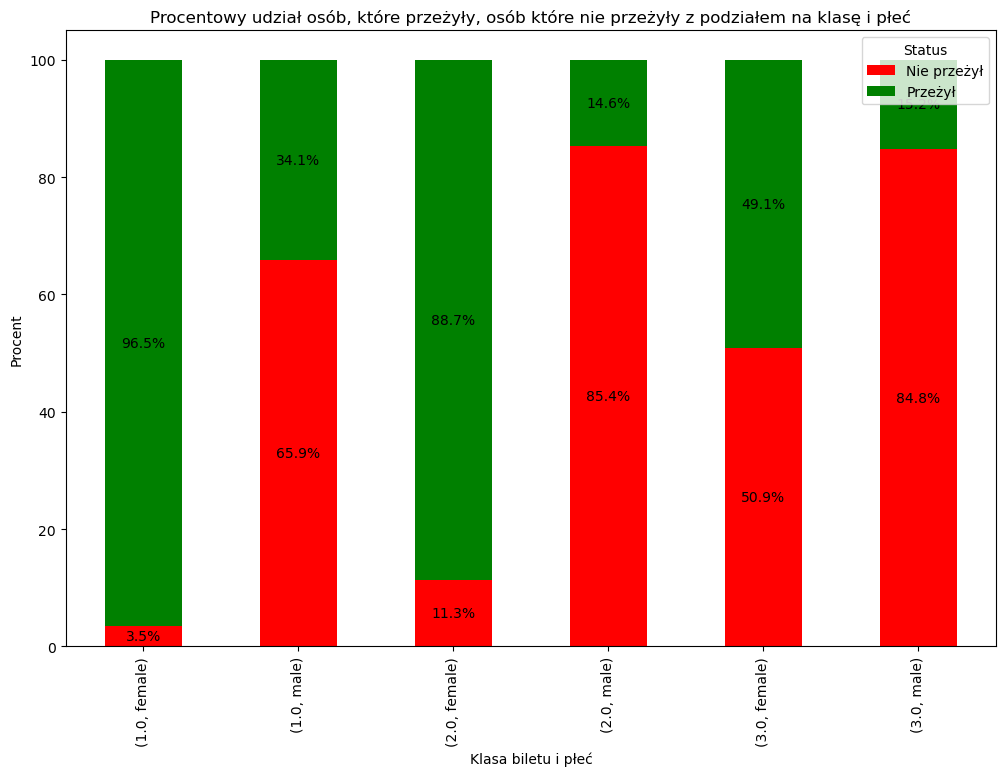

In [173]:
# Obliczenie procentowego udziału przeżycia z podziałem na klasę i płeć
survival_rate = df.groupby(['pclass', 'sex'])['survived'].value_counts(normalize=True).unstack() * 100

# Utworzenie wykresu
plt.figure(figsize=(12, 8))
survival_rate.plot(kind='bar', stacked=True, ax=plt.gca(), color=['red', 'green'])
plt.title('Procentowy udział osób, które przeżyły, osób które nie przeżyły z podziałem na klasę i płeć')
plt.xlabel('Klasa biletu i płeć')
plt.ylabel('Procent')
plt.legend(['Nie przeżył', 'Przeżył'], title='Status', loc='upper right')

# Dodanie etykiet z wartościami
for p in plt.gca().patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    plt.gca().annotate(f'{height:.1f}%', (x + width / 2, y + height / 2), ha='center', va='center')

plt.show()


W poszczególnych klasach od pierwszej do trzeciej uratowano odpowiednio 96.5%, 88.7%, 49.1% kobiet. W przypadku mężczyzn było to odpowiednio 34.1%, 14,6%, 15.2% mężczyzn.

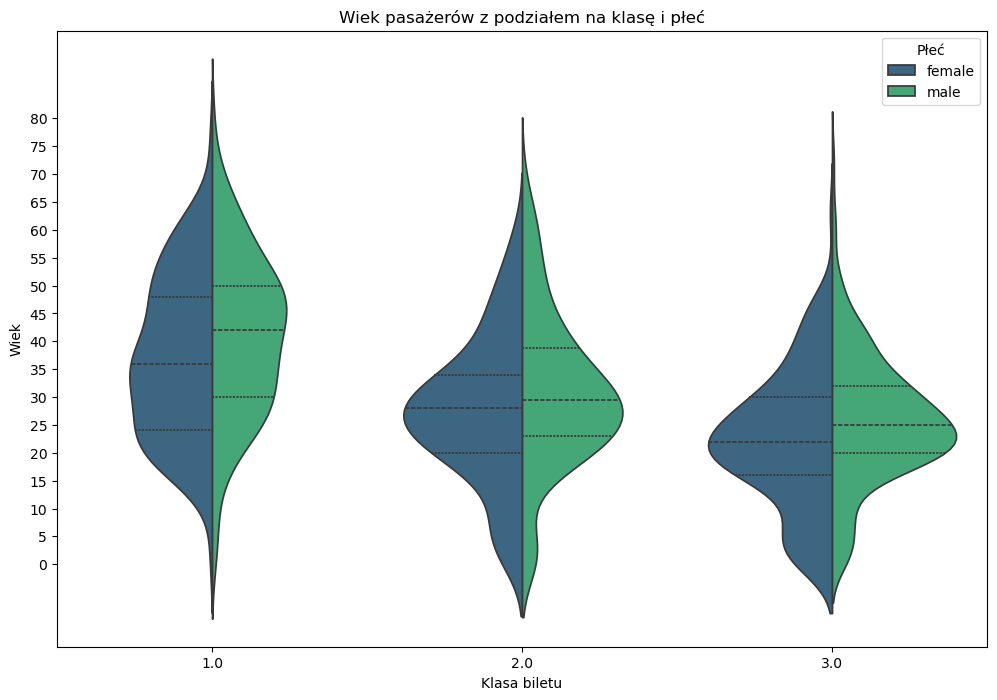

               count       mean        std     min   25%   50%    75%   max
pclass sex                                                                 
1.0    female  133.0  37.037594  14.272460  2.0000  24.0  36.0  48.00  76.0
       male    151.0  41.029250  14.578590  0.9167  30.0  42.0  50.00  80.0
2.0    female  103.0  27.499191  12.911813  0.9167  20.0  28.0  34.00  60.0
       male    158.0  30.815401  13.977355  0.6667  23.0  29.5  38.75  70.0
3.0    female  152.0  22.185307  12.205294  0.1667  16.0  22.0  30.00  63.0
       male    349.0  25.962273  11.682395  0.3333  20.0  25.0  32.00  74.0


In [174]:
# Upewnij się, że wiek jest liczbą
df['age'] = pd.to_numeric(df['age'], errors='coerce')

# Utworzenie wykresu
plt.figure(figsize=(12, 8))
sns.violinplot(x='pclass', y='age', hue='sex', data=df, split=True, inner='quart', palette='viridis')
plt.title('Wiek pasażerów z podziałem na klasę i płeć')
plt.xlabel('Klasa biletu')
plt.ylabel('Wiek')
plt.yticks(range(0, int(df['age'].max()) + 5, 5))  # Ustawienie podziałki co 5 lat
plt.legend(title='Płeć')
plt.show()

# Wyświetlenie statystyki podsumowującej
age_stats = df.groupby(['pclass', 'sex'])['age'].describe()
print(age_stats)


mediana wieku w kolejnych klasach była coraz niższa, przy czym mediana dla kobiet była niższa niż mediana dla mężczyzn.

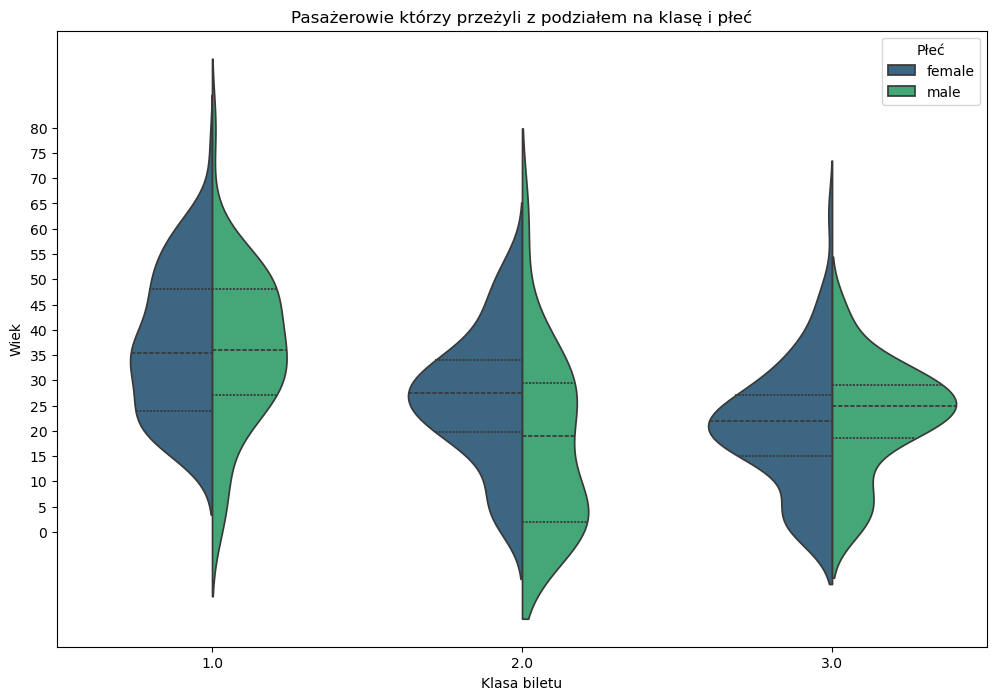

               count       mean        std      min    25%   50%   75%   max
pclass sex                                                                  
1.0    female  128.0  37.109375  13.938128  14.0000  24.00  35.5  48.0  76.0
       male     53.0  36.168240  15.091603   0.9167  27.00  36.0  48.0  80.0
2.0    female   92.0  26.711051  12.620804   0.9167  19.75  27.5  34.0  55.0
       male     23.0  17.449274  16.708542   0.6667   2.00  19.0  29.5  62.0
3.0    female   72.0  20.814815  12.321790   0.1667  15.00  22.0  27.0  63.0
       male     59.0  22.436441  10.708424   0.4167  18.50  25.0  29.0  45.0


In [187]:
# Upewnij się, że wiek jest liczbą
df['age'] = pd.to_numeric(df['age'], errors='coerce')

# Filtracja pasażerów którzy przeżyli
df_survived = df[df['survived'] == 1]

# Utworzenie wykresu
plt.figure(figsize=(12, 8))
sns.violinplot(x='pclass', y='age', hue='sex', data=df_survived, split=True, inner='quart', palette='viridis')
plt.title('Pasażerowie którzy przeżyli z podziałem na klasę i płeć')
plt.xlabel('Klasa biletu')
plt.ylabel('Wiek')
plt.yticks(range(0, int(df['age'].max()) + 5, 5))  # Ustawienie podziałki co 5 lat
plt.legend(title='Płeć')
plt.show()

# Wyświetlenie statystyki podsumowującej
age_stats = df_survived.groupby(['pclass', 'sex'])['age'].describe()
print(age_stats)

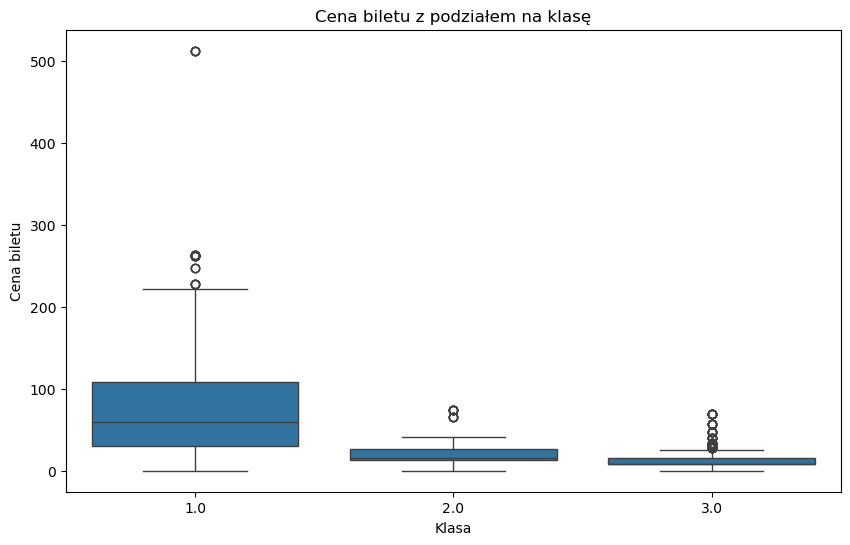

        count       mean        std  min      25%      50%       75%       max
pclass                                                                        
1.0     323.0  87.508992  80.447178  0.0  30.6958  60.0000  107.6625  512.3292
2.0     277.0  21.179196  13.607122  0.0  13.0000  15.0458   26.0000   73.5000
3.0     708.0  13.302889  11.494358  0.0   7.7500   8.0500   15.2458   69.5500


In [175]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='pclass', y='fare', data=df)
plt.title('Cena biletu z podziałem na klasę')
plt.xlabel('Klasa')
plt.ylabel('Cena biletu')
plt.show()

fare_stats = df.groupby('pclass')['fare'].describe()
print(fare_stats)

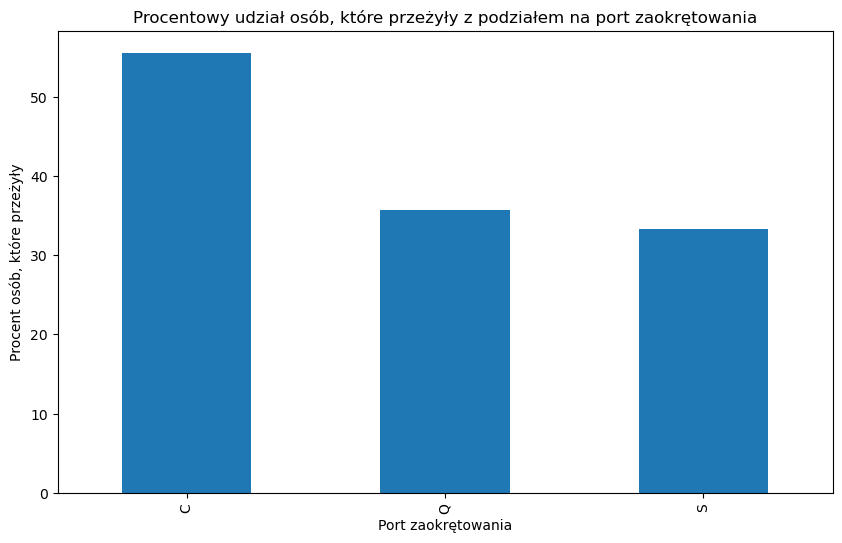

In [176]:
survival_rate = df.groupby('embarked')['survived'].mean() * 100
plt.figure(figsize=(10, 6))
survival_rate.plot(kind='bar')
plt.title('Procentowy udział osób, które przeżyły z podziałem na port zaokrętowania')
plt.xlabel('Port zaokrętowania')
plt.ylabel('Procent osób, które przeżyły')
plt.show()


najwięcej osób procentowo przeżyło zaokrętowanych z portu C - Cherbourg (Francja), następnie Q - Queenstown (Irlandia), S - Southampton (Wielka Brytania)

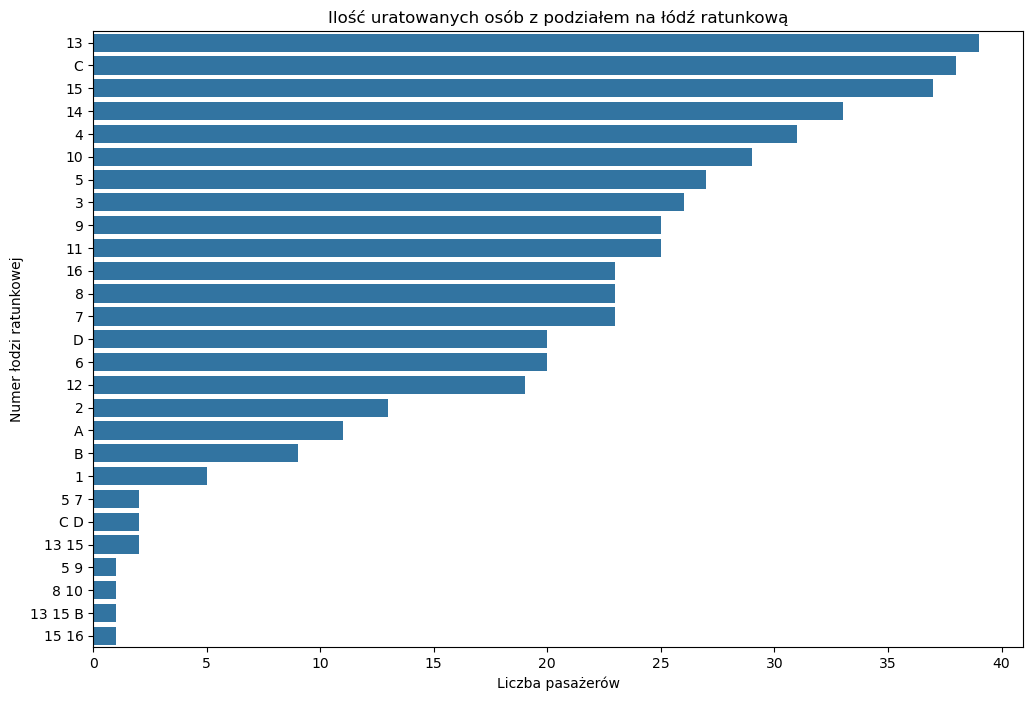

In [177]:
plt.figure(figsize=(12, 8))
sns.countplot(y='boat', data=df, order=df['boat'].value_counts().index)
plt.title('Ilość uratowanych osób z podziałem na łódź ratunkową')
plt.xlabel('Liczba pasażerów')
plt.ylabel('Numer łodzi ratunkowej')
plt.show()


bardzo niskie wypełnienie szalup ratunkowych pasażerami

Tytanic tonął około 2h40m
https://en.wikipedia.org/wiki/Sinking_of_the_Titanic

Ilość osób wraz z załogą *2200* osób https://www.youtube.com/watch?v=PmaUoeiss3k
teoretycznie możliwych do zadrania *1178 osób* (53.54% ogółu osób z załogą)
2200-1310=*890 załoga*

było 20 szalup po 60 miejsc czyli teoretycznie 1200 osób można było uratować, https://www.youtube.com/watch?v=G-Db2CTRGdk

Nim pasażerowie trzeciej klasy wydostali się na pokład, marynarze pozamykali drzwi i boczne wyjścia. Według niektórych źródeł conajmniej jedno było otwarte.
Mimo to po zderzeniu Titanica z górą lodową zginęła aż połowa pasażerów i trzy czwarte personelu 25%*890=*223 osoby z załogi*. 
https://www.newsweek.pl/historia/titanic-katastrofa-w-nocy-z-14-na-15-kwietnia-1912-r-szczegoly-zatoniecia-titanica/cvf6eed

 Przeżyło katastrofę tylko około 712 osób łącznie z załogą. https://pl.wikipedia.org/wiki/RMS_Titanic
 


In [178]:
# pogrupuj df według 'pclass' i wyświetl liczbę wystąpień
print("ilość osób z podziałem na klasy")
print(df.groupby('pclass').size())

ilość osób z podziałem na klasy
pclass
1.0    323
2.0    277
3.0    709
dtype: int64


In [179]:
survived_sum = df['survived'].sum()
print("ilość pasażerów, którzy przeżyli:", survived_sum, " ogółem przeżyło:",survived_sum + 223, " średnio osób ogółem na jedną szalupę:", (survived_sum +223)/20 )
print("Średnie wypełnienie szalup ratunkowych wyniosło:", ((survived_sum +223)/20)/60*100,"%")
survived_zeros = df['survived'].value_counts().get(0, 0)
print("liczba pasażerów, którzy nie przeżyli:", survived_zeros)
body_numeric = df['body'].apply(pd.to_numeric, errors='coerce').notnull().sum()
print("Ilość odnalezionych ciał pasażerów", body_numeric, ", co stanowi:", body_numeric/survived_zeros*100,"% pasażerów, którzy nie przeżyli")

ilość pasażerów, którzy przeżyli: 500.0  ogółem przeżyło: 723.0  średnio osób ogółem na jedną szalupę: 36.15
Średnie wypełnienie szalup ratunkowych wyniosło: 60.24999999999999 %
liczba pasażerów, którzy nie przeżyli: 809
Ilość odnalezionych ciał pasażerów 121 , co stanowi: 14.956736711990112 % pasażerów, którzy nie przeżyli


### Wnioski
    - Bardzo ogólne przepisy, pozwalały Armatorom na zapewnienie bardzo niskiego poziomu bezpieczeństa, zapewnienie 30% miejsc w szalupach  ratunkowych dla ogółu ludzi na statku (pasażerowie z obsługą), uznawano za wystarczające (przy takich założeniach co z pozostałymi 70%, przepis tragiczny). Obecnie wymagane jest aby 100% ogółu pasażerów i załogi miało miejsce w szalupach ratunkowych.
    - Osoby mające wypatrywać przeszkód na drodze statku, w tym gór lodowych nie miały lornetki. Kapitan miał ostrzeżenia o górach lodowych, które zignorował i kazał zwiększyć prędkość statku, ponieważ statek miał opóźnienie. Sternik próbował ominąć górę lodową, jednak się to nieudało, rozpruty został bok statku, część znajdująca się pod powierzchnią wody, 6 przedziałów (nity mocujące stalowe płyty były słabej jakości). Prawdopodobnie gdyby uderzenie było czołowe uszkodzonych zostałoby maksymalnie 4 przedziały, czyli teoretycznie Tytanic by nie zatonął (założenia konstrukcyjne).
    - Brak ćwiczeń z ewakuacji skutkował chaosem, brakiem koordynacji. Kapoki ratunkowe były mało praktyczne. Szalup ratunkowych było za mało (20 szalup, powinno być minimum około 40, pierwotnie założenia konstrukcyjne były aby szalup było 48). Kapitan spuszczał szalupy ratunkowe nie wpełni załadowane (ogółem średnio załadowane w 60%).
    - Załoga pomimo zaistniałej sytuacji, starała się pomagać w ewakuacji. Gdyby wykazali się tchórzostwem ratowaliby w pierwsze kolejności siebie czyli powiedźmy 25% załogi by zginęło przy zamykaniu grodzi wodoszczelnych, zamykaniu drzwi. 75% załogi by ocanało stanowiłoby to 668 osób. 1200-668=532 pozostałoby miejsc w szalupach, 532 -pasażerowie 1 klasy(323)=209 pozostałoby miejsc, 209/277=75.45% pasażerów drugiej klasy. Przy takim założeniu uratowano by 532 pasażerów.
    - Przy przeżywalności pasażerów, kluczowe były **klasa biletu pasażera**, bliżej szalup ratunkowych, **płeć i wiek -- kobiety i dzieci były ratowane w pierwszej kolejności**. Osoby młodcze miały większe szanse na przeżycie.
    
    
    